In [17]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing as mp

# Crear dos arreglos grandes
size = 10**6  # Un millón de elementos
array_a = np.arange(size)
array_b = np.arange(size)

start_time = time.time()
result_for = []
for i in range(size):
    result_for.append(array_a[i] * array_b[i])
end_time = time.time()

print(f"Tiempo con bucle 'for' original: {end_time - start_time} segundos")

start_time = time.time()
result_vectorized = array_a * array_b
end_time = time.time()

print(f"Tiempo con vectorización usando NumPy: {end_time - start_time} segundos")

# Función para multiplicar elementos (utilizada en joblib)
def multiply_elements(i):
    return array_a[i] * array_b[i]

start_time = time.time()
result_joblib = Parallel(n_jobs=-1)(delayed(multiply_elements)(i) for i in range(size))
end_time = time.time()

print(f"Tiempo con paralelización usando joblib: {end_time - start_time} segundos")

# Función para multiplicar elementos (utilizada en multiprocessing)
def multiply_elements_mp(i):
    return array_a[i] * array_b[i]

start_time = time.time()

# Crear un pool de procesos
with mp.Pool(processes=mp.cpu_count()) as pool:
    result_multiprocessing = pool.map(multiply_elements_mp, range(size))

end_time = time.time()

print(f"Tiempo con paralelización usando multiprocessing: {end_time - start_time} segundos")

Tiempo con bucle 'for' original: 0.4208524227142334 segundos
Tiempo con vectorización usando NumPy: 0.0025131702423095703 segundos
Tiempo con paralelización usando joblib: 12.326667547225952 segundos
Tiempo con paralelización usando multiprocessing: 3.3550472259521484 segundos


In [18]:

import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing as mp
import matplotlib.pyplot as plt

# Crear dos arreglos grandes
size = 10**6  # Un millón de elementos
array_a = np.arange(size)
array_b = np.arange(size)
n_runs = 5  # Número de veces que se ejecutará cada método



In [19]:
# Función para medir el tiempo del bucle 'for' original
def time_for_loop():
    start_time = time.time()
    result_for = []
    for i in range(size):
        result_for.append(array_a[i] * array_b[i])
    end_time = time.time()
    return end_time - start_time

# Función para medir el tiempo de la vectorización con NumPy
def time_vectorization():
    start_time = time.time()
    result_vectorized = array_a * array_b
    end_time = time.time()
    return end_time - start_time

# Función para medir el tiempo de la paralelización con joblib
def multiply_elements(i):
    return array_a[i] * array_b[i]

def time_joblib():
    start_time = time.time()
    result_joblib = Parallel(n_jobs=-1)(delayed(multiply_elements)(i) for i in range(size))
    end_time = time.time()
    return end_time - start_time

# Función para medir el tiempo de la paralelización con multiprocessing
def multiply_elements_mp(i):
    return array_a[i] * array_b[i]

def time_multiprocessing():
    start_time = time.time()
    with mp.Pool(processes=mp.cpu_count()) as pool:
        result_multiprocessing = pool.map(multiply_elements_mp, range(size))
    end_time = time.time()
    return end_time - start_time




In [20]:
# Ejecutar cada método varias veces y recolectar los tiempos
times_for_loop = [time_for_loop() for _ in range(n_runs)]
times_vectorization = [time_vectorization() for _ in range(n_runs)]
times_joblib = [time_joblib() for _ in range(n_runs)]
times_multiprocessing = [time_multiprocessing() for _ in range(n_runs)]




In [21]:
import pandas as pd

# Crear un DataFrame con los tiempos
df_times = pd.DataFrame({
    'for_loop': times_for_loop,
    'vectorization': times_vectorization,
    'joblib': times_joblib,
    'multiprocessing': times_multiprocessing
})

# Calcular estadísticas básicas
stats_summary = df_times.describe().loc[['mean', 'std', 'min', 'max']]
print(stats_summary)



      for_loop  vectorization     joblib  multiprocessing
mean  0.359747       0.002976  12.512905         3.834416
std   0.024685       0.002060   0.690996         0.354984
min   0.338081       0.002007  12.056915         3.475327
max   0.401988       0.006660  13.728028         4.296478


<ipython-input-22-d07803b71761>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


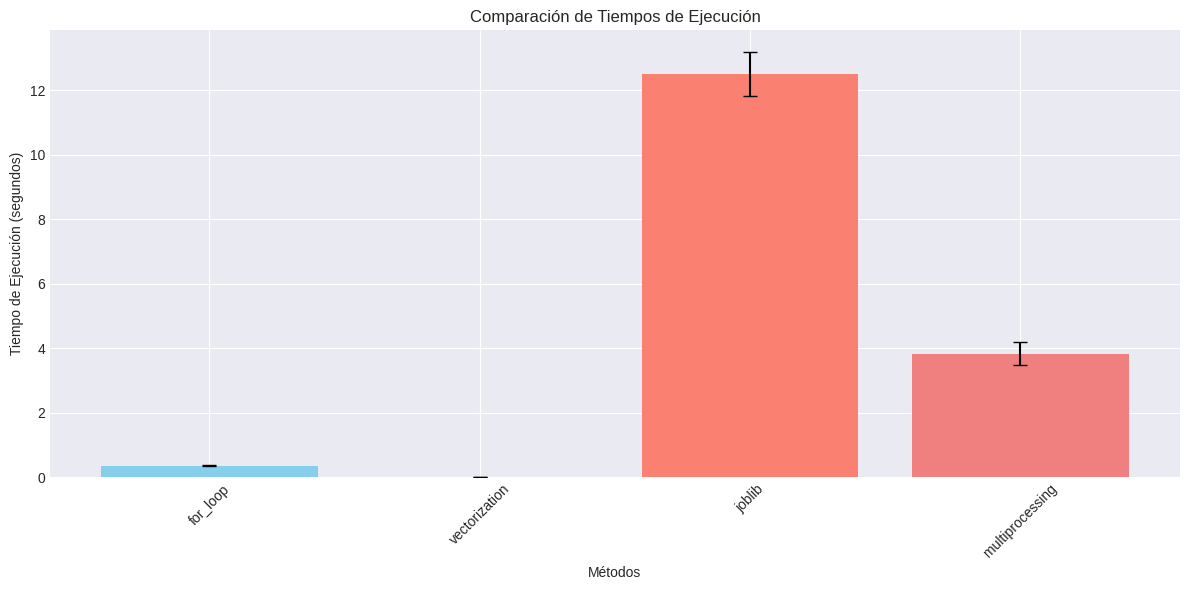

In [22]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Crear un gráfico de barras con las medias y desviaciones estándar
plt.figure(figsize=(12, 6))

methods = ['for_loop', 'vectorization', 'joblib', 'multiprocessing']
mean_times = df_times.mean()
std_times = df_times.std()

plt.bar(methods, mean_times, yerr=std_times, capsize=5, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.xlabel('Métodos')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Tiempos de Ejecución')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
